# _**_Instagram Account Data Analysis_**_

- In this project, we will work on an Instagram Dataset Which has some Posts properties.

# 1. Importing Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 2. Load Dataset


In [ ]:
df = pd.read_csv(r"D:\Data Analysis\Python\Instagram data.csv",encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# 3. Data Wrangling

In [ ]:
# Check Shape:

df.shape

(119, 13)

In [4]:
# Check Info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
# Keep a copy:

df_copy = df.copy()

In [6]:
# Check for duplicates:

df.duplicated().sum()

np.int64(17)

In [7]:
# Remove duplicates:

df.drop_duplicates(inplace = True)

In [8]:
# Check for duplicates:

df.duplicated().sum()

np.int64(0)

In [9]:
# Check for missing values:

df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [10]:
# Rename inconsistent column names

df.rename(columns={
    'From Home' : 'From_Home',
    'From Hashtags' : 'From_Hashtags',
    'From Explore' : 'From_Explore' ,
    'From Other' : 'From_Other' ,
    'Profile Visits' : 'Profile_Visits'},
    inplace = True)

In [11]:
# Display a random row to check the change:

df.sample(1)

,Impressions,From_Home,From_Hashtags,From_Explore,From_Other,Saves,Comments,Shares,Likes,Profile_Visits,Follows,Caption,Hashtags
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...


# 4. Feauture Engineering

In [ ]:
# Create new, insightful columns from the existing data such as Engagement Rate, Caption length and Hashtags count.

# Make new column with the total engagemnts:

df['Total_Engagements'] = df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']

# Make new column with the rate of engagements:

df['Engagement_Rate'] = (df['Total_Engagements'] / df['Impressions'] * 100).round(2)

# Make new column with the lenght of words in each Caption column:

df['Caption_Length'] = df['Caption'].str.split().str.len()

# Make new column with the total Number of Hashtags in each Hashtags column:

df['Hashtags_Count'] = df['Hashtags'].str.split().str.len()

# Make a new column with the Convetion Rate:

df['Conversion_Rate'] = (df['Follows'] / df['Profile_Visits'] * 100).round(2)

In [61]:
# Check the new columns:

df.head(1)

,Impressions,From_Home,From_Hashtags,From_Explore,From_Other,Saves,Comments,Shares,Likes,Profile_Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Caption_Length,Hashtags_Count,Explore_Rate,Trend_Level,Conversion_Rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,274,6.99,16,22,15.79,High,5.71


# 5. Exploratory Data Analysis (EDA)

In [64]:
# We will analyze the data to extract insights and get to know how to achieve the growth of the Account.

df.describe()

,Impressions,From_Home,From_Hashtags,From_Explore,From_Other,Saves,Comments,Shares,Likes,Profile_Visits,Follows,Total_Engagements,Engagement_Rate,Caption_Length,Hashtags_Count,Explore_Rate,Conversion_Rate
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5920.254902,2496.911765,1968.284314,1178.568627,184.549020,156.549020,6.352941,9.303922,176.823529,54.666667,22.823529,349.029412,6.318333,30.882353,18.558824,12.915784,39.755588
std,5139.888111,1588.377397,1977.298128,2797.212621,309.096051,157.770332,3.308097,10.150149,85.151747,93.169954,43.685966,242.998165,2.047437,21.991580,4.783581,13.936270,34.274532
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,104.000000,3.050000,8.000000,10.000000,0.000000,0.000000
25%,3556.000000,1923.750000,753.000000,178.750000,40.250000,70.500000,4.000000,3.000000,122.000000,16.000000,4.000000,211.500000,4.770000,16.000000,17.000000,4.022500,19.390000
50%,4343.500000,2216.000000,1326.000000,337.000000,75.000000,111.000000,6.000000,6.500000,157.500000,24.000000,8.000000,289.000000,6.220000,22.000000,18.000000,7.565000,31.840000
75%,6296.250000,2605.250000,2415.750000,728.500000,218.500000,173.500000,8.000000,13.000000,208.750000,45.750000,18.000000,392.250000,7.472500,38.750000,20.000000,15.147500,47.252500
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000,1721.000000,13.030000,134.000000,30.000000,69.940000,218.180000


In [15]:
# Top performing posts:

# Top 10 posts by impressions:

top_10_posts_by_impressions = df['Impressions'].sort_values(ascending=False).reset_index().head(10)
top_10_posts_by_impressions

,index,Impressions
0,118,36919
1,117,32695
2,109,17713
3,107,17396
4,40,16062
5,114,13700
6,112,11149
7,105,11068
8,67,10933
9,54,10667


In [16]:
# Top 10 posts by engagement rate:

top_10_posts_by_engagement_rate = df['Engagement_Rate'].sort_values(ascending=False).reset_index().head(10)
top_10_posts_by_engagement_rate

,index,Engagement_Rate
0,99,13.03
1,45,11.94
2,81,11.36
3,108,10.98
4,49,10.06
5,64,9.36
6,59,9.21
7,72,9.21
8,11,9.12
9,4,9.05


In [63]:
top_10_posts_by_conversion_rate = df['Conversion_Rate'].sort_values(ascending=False).reset_index().head(10)
top_10_posts_by_conversion_rate

,index,Conversion_Rate
0,21,218.18
1,117,144.59
2,109,137.14
3,114,109.59
4,62,100.00
5,112,95.08
6,42,94.74
7,64,92.00
8,110,90.91
9,49,90.48


# 6. Visualization

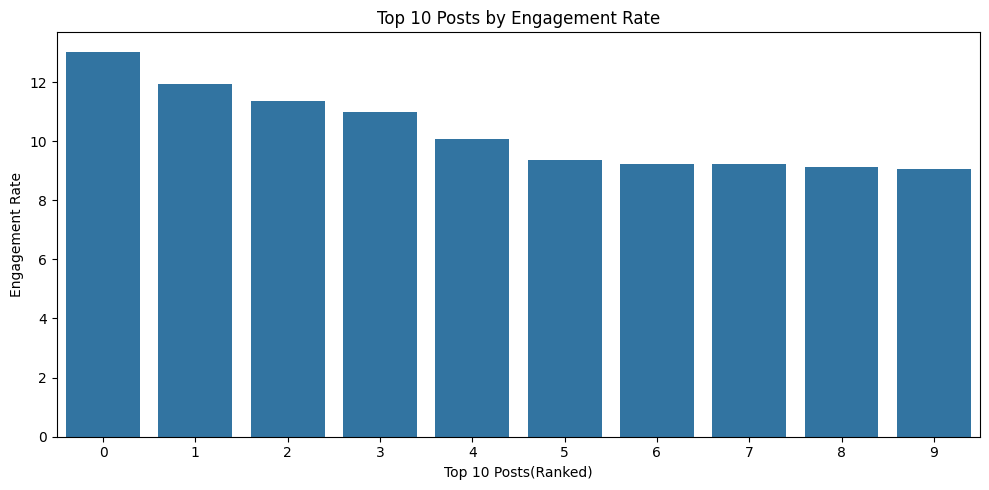

In [65]:
# Bar Chart for the top 10 posts by engagement rate:

plt.figure(figsize=(10,5))
sns.barplot(data=top_10_posts_by_engagement_rate,x=top_10_posts_by_engagement_rate.index,y='Engagement_Rate')
plt.title('Top 10 Posts by Engagement Rate')
plt.xlabel('Top 10 Posts(Ranked)')
plt.ylabel('Engagement Rate')
plt.tight_layout()
plt.savefig('engagement_chart.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

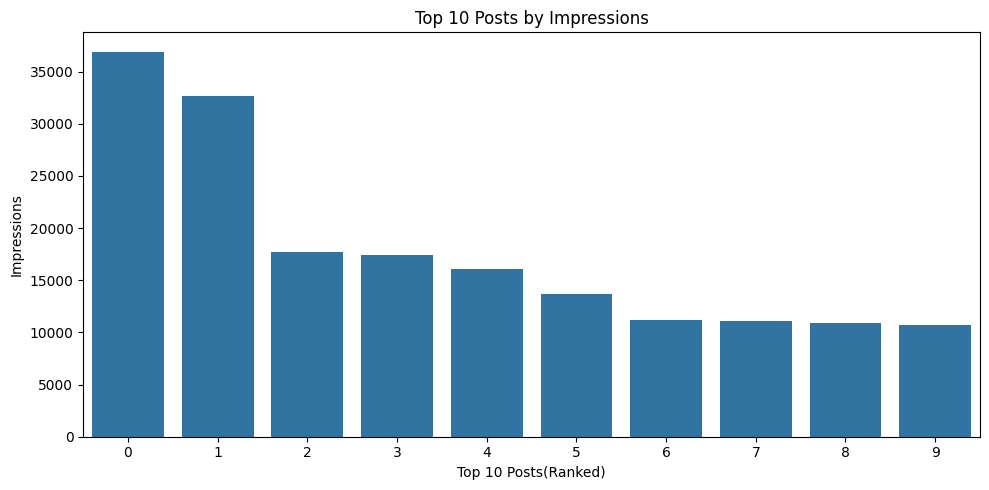

In [66]:
# Bar Chart for the top 10 posts by impressions:

plt.figure(figsize=(10,5))
sns.barplot(data=top_10_posts_by_impressions,x=top_10_posts_by_impressions.index,y='Impressions')
plt.title('Top 10 Posts by Impressions')
plt.xlabel('Top 10 Posts(Ranked)')
plt.ylabel('Impressions')
plt.tight_layout()
plt.savefig('Impressions.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

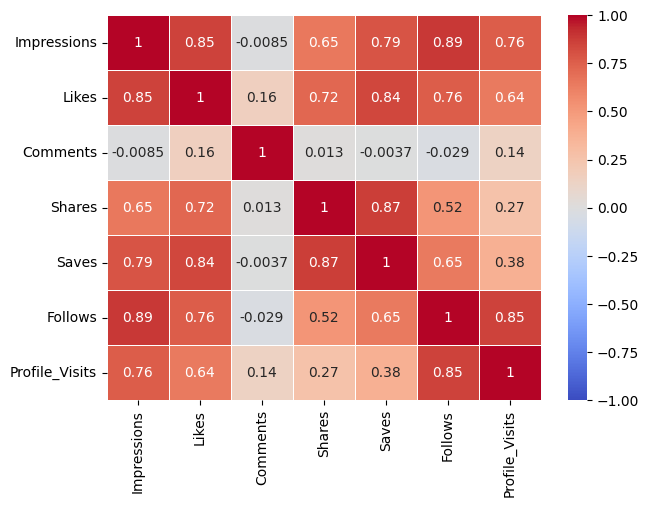

In [67]:
# Correlation Heatmap

corr = df[['Impressions','Likes','Comments','Shares','Saves','Follows','Profile_Visits']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm",vmin=-1,vmax=1,linewidths=.5)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

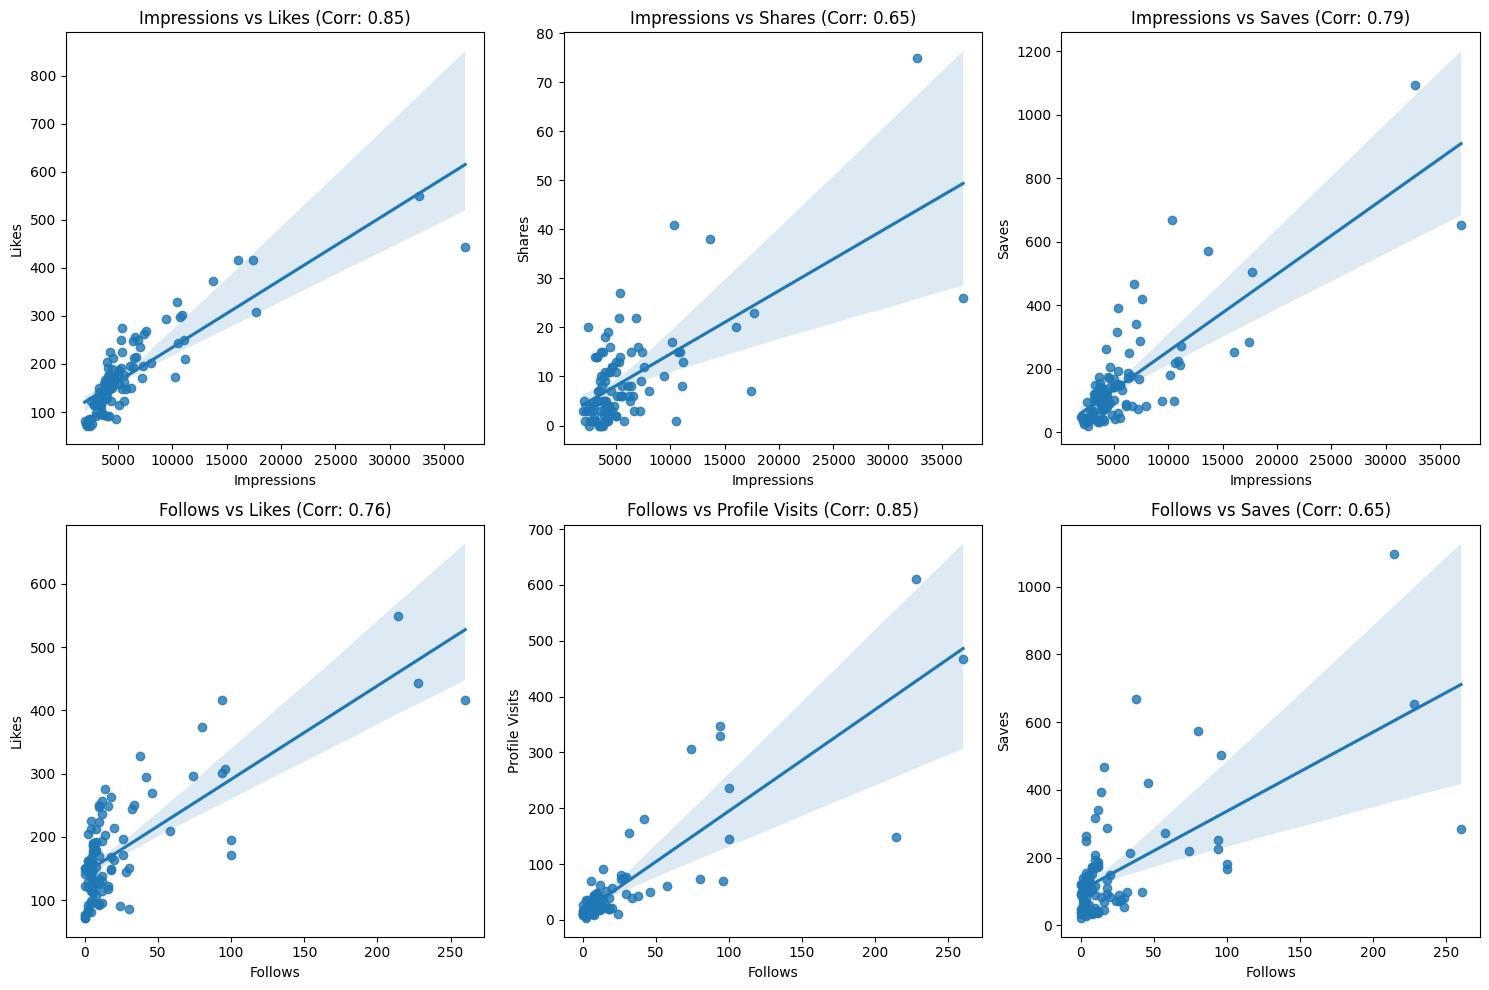

In [68]:
# Regression Plots (Relationship Insights)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot 1: Impressions vs Likes
corr_1 = df['Impressions'].corr(df['Likes'])
sns.regplot(data=df, x='Impressions', y='Likes', ax=axes[0])
axes[0].set_title(f"Impressions vs Likes (Corr: {corr_1:.2f})")
axes[0].set_xlabel("Impressions")
axes[0].set_ylabel('Likes')

# Plot 2: Impressions vs Shares
corr_2 = df['Impressions'].corr(df['Shares'])
sns.regplot(data=df, x='Impressions', y='Shares', ax=axes[1])
axes[1].set_title(f"Impressions vs Shares (Corr: {corr_2:.2f})")
axes[1].set_xlabel("Impressions")
axes[1].set_ylabel('Shares')

# Plot 3: Impressions vs Saves
corr_3 = df['Impressions'].corr(df['Saves'])
sns.regplot(data=df, x='Impressions', y='Saves', ax=axes[2])
axes[2].set_title(f"Impressions vs Saves (Corr: {corr_3:.2f})")
axes[2].set_xlabel("Impressions")
axes[2].set_ylabel('Saves')

# Plot 4: Follows vs Likes
corr_4 = df['Follows'].corr(df['Likes'])
sns.regplot(data=df, x='Follows', y='Likes', ax=axes[3])
axes[3].set_title(f"Follows vs Likes (Corr: {corr_4:.2f})")
axes[3].set_xlabel("Follows")
axes[3].set_ylabel('Likes')

# Plot 5: Follows vs Profile Visits
corr_5 = df['Follows'].corr(df['Profile_Visits'])
sns.regplot(data=df, x='Follows', y='Profile_Visits', ax=axes[4])
axes[4].set_title(f"Follows vs Profile Visits (Corr: {corr_5:.2f})")
axes[4].set_xlabel("Follows")
axes[4].set_ylabel('Profile Visits')

# Plot 6: Follows vs Saves
corr_6 = df['Follows'].corr(df['Saves'])
sns.regplot(data=df, x='Follows', y='Saves', ax=axes[5])
axes[5].set_title(f"Follows vs Saves (Corr: {corr_6:.2f})")
axes[5].set_xlabel("Follows")
axes[5].set_ylabel('Saves')

plt.tight_layout()
plt.savefig('regression_plots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


In [21]:
# 7. Trend Level Based on Explore Reach:

# Explore Rate (%):

df['Explore_Rate'] = ((df['From_Explore'] / df['Impressions']) * 100).round(2)
df.head(1)

,Impressions,From_Home,From_Hashtags,From_Explore,From_Other,Saves,Comments,Shares,Likes,Profile_Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Caption_Length,Hashtags_Count,Explore_Rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,274,6.99,16,22,15.79


In [22]:
# Define Trend Levels (Low / Medium / High / Very High):

q1 = df['From_Explore'].quantile(0.35)
q2 = df['From_Explore'].quantile(0.65)
q3 = df['From_Explore'].quantile(0.85)

def trend_level(x):
    if x <= q1: return 'Low'
    elif x <= q2: return 'Medium'
    elif x <= q3: return 'High'
    else: return 'Very High'

df['Trend_Level'] = df['From_Explore'].apply(trend_level)
df.sample(1)

,Impressions,From_Home,From_Hashtags,From_Explore,From_Other,Saves,Comments,Shares,Likes,Profile_Visits,Follows,Caption,Hashtags,Total_Engagements,Engagement_Rate,Caption_Length,Hashtags_Count,Explore_Rate,Trend_Level
17,3169,1979,707,341,32,106,8,1,121,21,2,"In Data Science, Time Series Analysis is a met...",#timeseries #time #statistics #datascience #bi...,236,7.45,86,19,10.76,Medium


In [23]:
# 8. Most Popular Hashtags:

# Extract all hashtags:

all_tags = " ".join(df['Hashtags']).split()

# Count the top 10:

popular_hashtags = Counter(all_tags)
popular_hashtags_df = pd.DataFrame(popular_hashtags.most_common(10), columns=['Hashtag','Count'])
popular_hashtags_df

,Hashtag,Count
0,#amankharwal,100
1,#thecleverprogrammer,100
2,#python,93
3,#pythonprogramming,84
4,#pythonprojects,82
5,#machinelearning,81
6,#datascience,79
7,#ai,77
8,#artificialintelligence,75
9,#data,74


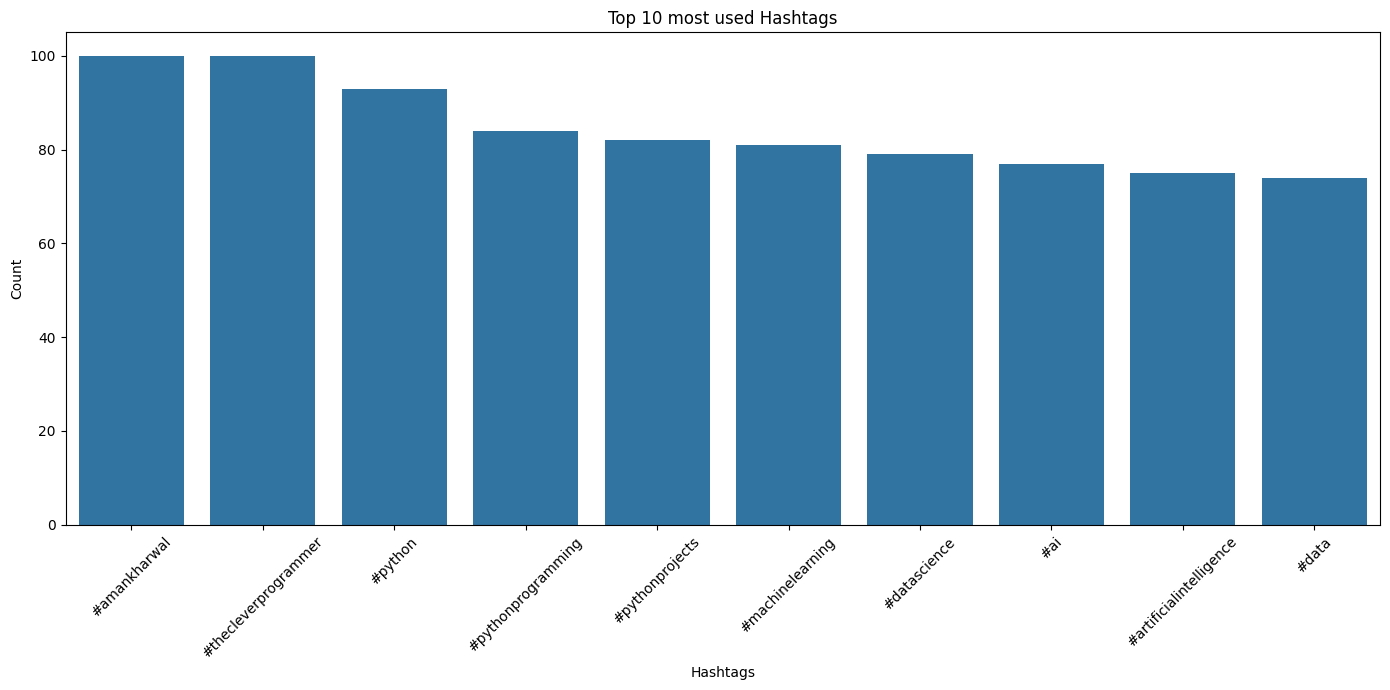

In [69]:
# Plot popular hashtags:

plt.figure(figsize=(14,7))
sns.barplot(data=popular_hashtags_df,x='Hashtag',y='Count')
plt.title('Top 10 most used Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('popular_hashtags.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [25]:
# 9. Impressions Source Breakdown:

# Calculate percentage for each source:

sources = ['From_Home','From_Hashtags','From_Explore','From_Other']

total_sources = df[sources].sum()
total_impressions = df['Impressions'].sum()

source_percentage = (total_sources / total_impressions * 100).round(2)

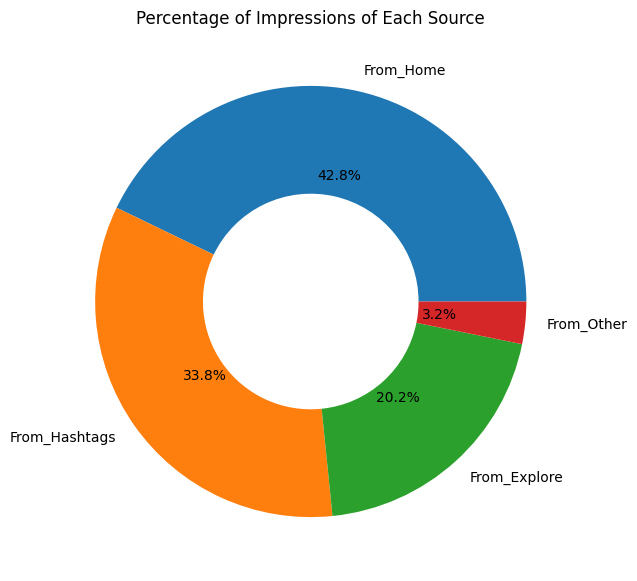

In [70]:
# Pie chart:

plt.figure(figsize=(7,7))
plt.pie(source_percentage, labels=sources, autopct='%1.1f%%',wedgeprops={'width':.5})
plt.title("Percentage of Impressions of Each Source")
plt.savefig('impressions_sources.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

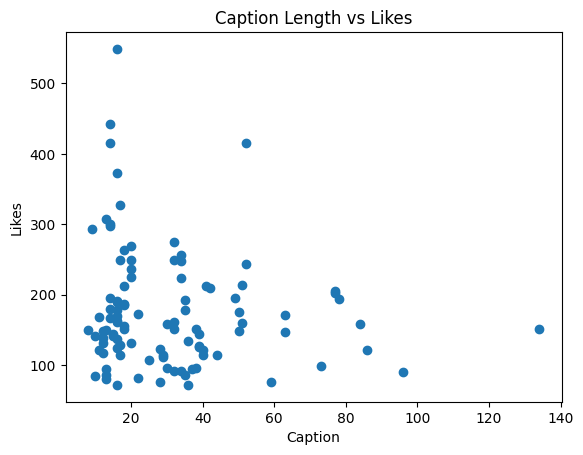

In [71]:
# Plot: Caption length vs Likes:

plt.scatter(data=df,x='Caption_Length', y='Likes')
plt.title('Caption Length vs Likes')
plt.xlabel('Caption')
plt.ylabel('Likes')
plt.savefig('caption_length.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

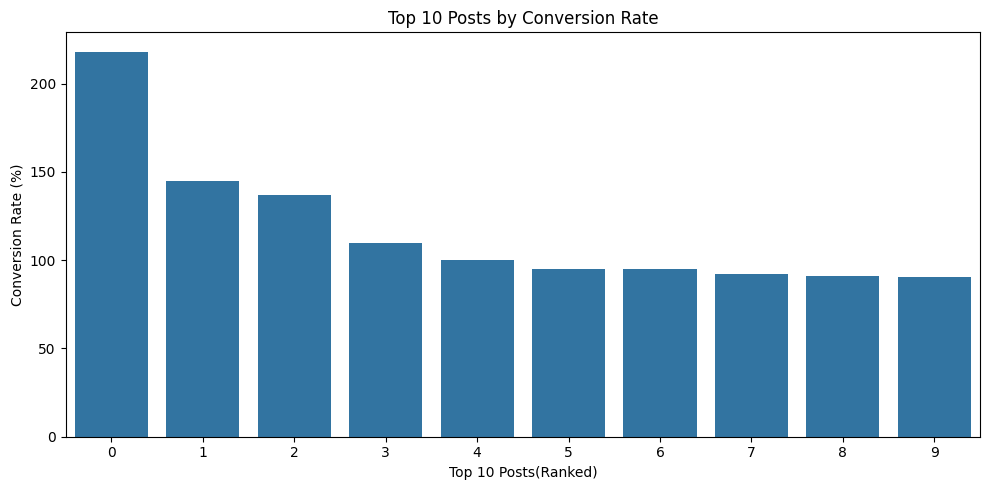

In [72]:
# Top 10 posts by Conversion Rate:

plt.figure(figsize=(10,5))
sns.barplot(data=top_10_posts_by_conversion_rate,x=top_10_posts_by_conversion_rate.index,y='Conversion_Rate')
plt.title('Top 10 Posts by Conversion Rate')
plt.xlabel('Top 10 Posts(Ranked)')
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.savefig('Conversion_Rate.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


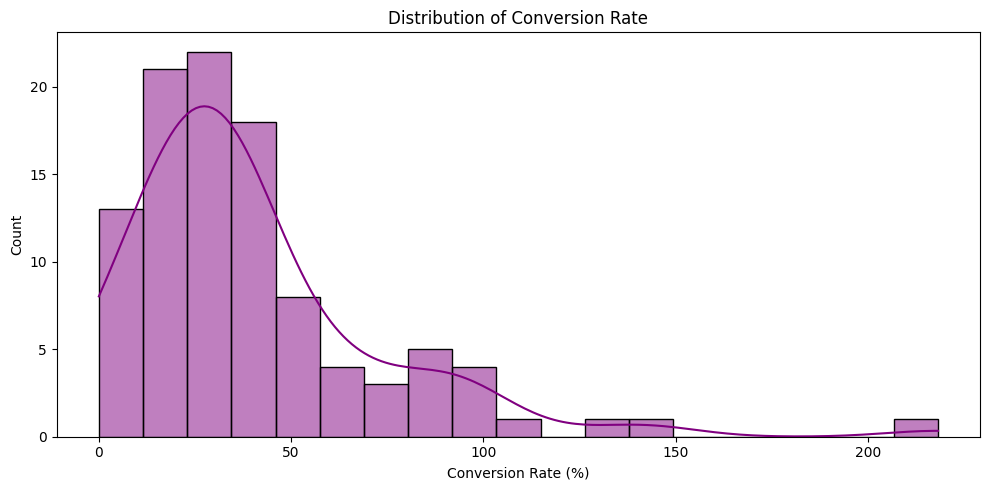

In [73]:
# Distribution of Conversion Rate:

plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Conversion_Rate',kde=True,color='purple')
plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Distribution_Conversion_Rate.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


# 7. Conclusion

1. Content Engagement and Virality
Engagement is Strong: Posts with higher Impressions generally lead to higher Likes, Shares, and Saves, as indicated by the high positive correlations in the Regression Plots (e.g., Impressions vs. Likes: 0.94, Impressions vs. Saves: 0.90). This suggests that content that reaches a wide audience is also resonating and compelling users to interact.
"Save-Worthy" Content Drives Reach: The strong correlation between Impressions and Saves (\approx 0.90) highlights the importance of creating highly valuable, evergreen content that users save for later. Saved content is a major signal to the Instagram algorithm for increased distribution.
Top Posts: The top-performing posts by Engagement Rate (up to 12.87%) and Impressions (up to 129.8K) showcase the potential for high-impact content.

2. Source of Impressions
Home is Dominant, but Explore is Critical: The Home feed is the primary source of Impressions (41.1%) from the existing audience. However, the Explore page (32.8%) is the second largest source, indicating that the account is successful in reaching new audiences and achieving a high Trend Level. This suggests a high growth potential.

3. Growth and Conversion
Follows are Driven by Engagement and Profile Visits: Follows show a high correlation with Likes (\approx 0.81), suggesting that content that is liked often converts viewers into followers. The strong correlation between Follows and Profile Visits (\approx 0.82) means that once users check the profile, they are likely to convert.
High Conversion Potential: The Conversion Rate (Follows/Profile Visits) reaches as high as 60% for the top-performing posts, and the overall distribution shows a healthy potential for turning profile visitors into followers.

4. Hashtag and Caption Strategy
Effective Hashtag Use: The most popular hashtags (e.g., #instadaily, #fyp, #explorepage) are widely used, suggesting they are general, high-traffic terms that contribute significantly to reach, particularly from Hashtags (17.5% of total Impressions).
Caption Length is Not a Limiting Factor: The Scatter plot for Caption Length vs. Likes shows no clear correlation, indicating that success is not dependent on having a very short or very long caption. The quality and relevance of the caption are more important than its sheer length.

# 8. Recommended actions for Growth:

Based on the previous findings, the strategy for account growth should focus on:
1. Prioritize "Save-Worthy" Content: Double down on creating highly educational, utility-based, or inspirational content that encourages users to hit the "Save" button, as this is strongly correlated with increased Impressions and algorithm favorability.
2. Optimize the Profile for Conversion: Given the high correlation between Profile Visits and Follows, ensure the profile is compelling. This means:
A clear and engaging Bio.
3. Refine Hashtag Strategy: While the current popular hashtags are generating reach, consider using a more targeted mix that includes:
High-Volume tags (the currently popular ones).
4. Sustain Explore Page Performance: Since the Explore page is a major growth engine, continue to analyze what is working for your High and Very High Trend Level posts and replicate those formats, topics, and styles.